In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
c_1 = np.random.normal((0,0),0.07,(100,2))
c_2 = np.random.normal((0.25,0.25),0.07,(100,2))
y_1 = np.zeros(100)
y_2 = np.ones(100)

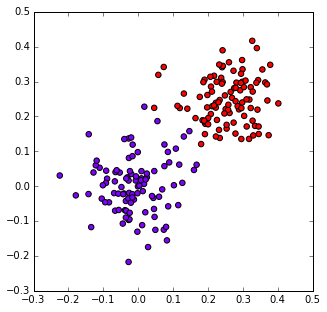

In [2]:
k1 = np.array([.25,.25])
k2 = np.array([.3,.3])
c = np.concatenate([c_1,c_2])
y = np.concatenate([y_1,y_2])
y_test = np.array(y)
plt.figure(figsize=(5,5))
plt.scatter(c[:,0],c[:,1],c=y,s=30,cmap=plt.cm.rainbow)

In [3]:
#now comes the 2-means algorithm
def iterate(center_1,center_2):
    c1 = center_1
    c2 = center_2
    c1_x = c1[0]
    c1_y = c1[1]
    c2_x = c2[0]
    c2_y = c2[1]
    #print c1,c2
    for i in range(len(c)):
        #caculate distance
        d1 = (c1[0] - c[i][0])**2 + (c1[1] - c[i][1])**2
        d2 = (c2[0] - c[i][0])**2 + (c2[1] - c[i][1])**2
        if d1 < d2:
            y[i] = 0
        else:
            y[i] = 1
    for i in range(len(y)):
        if y[i] == 0:
            c1_x += c[i][0]
            c1_y += c[i][1]
        else:
            c2_x += c[i][0]
            c2_y += c[i][1]
    c1 = [c1_x/100.0,c1_y/100.0]
    c2 = [c2_x/100.0,c2_y/100.0]
    return c1,c2

after iteration 1 the accuracy is 0.66000


'for i in range(8):\n    a,b = iterate(a,b)\n    #plt.figure(figsize=(5,5))\n    plt.subplot(3,3,i+2)\n    plt.scatter(c[:,0],c[:,1],c=y,s=30,cmap=plt.cm.rainbow)'

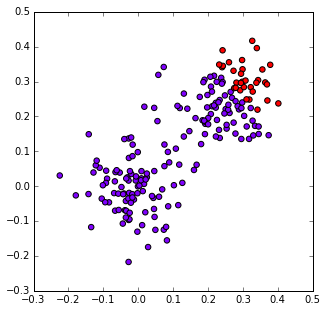

In [4]:
a,b = iterate(k1,k2)
plt.figure(figsize=(5,5))
plt.scatter(c[:,0],c[:,1],c=y,s=30,cmap=plt.cm.rainbow)
print "after iteration 1 the accuracy is %.5f"%np.mean(y == y_test)
'''for i in range(8):
    a,b = iterate(a,b)
    #plt.figure(figsize=(5,5))
    plt.subplot(3,3,i+2)
    plt.scatter(c[:,0],c[:,1],c=y,s=30,cmap=plt.cm.rainbow)'''

the accuracy is 0.99000


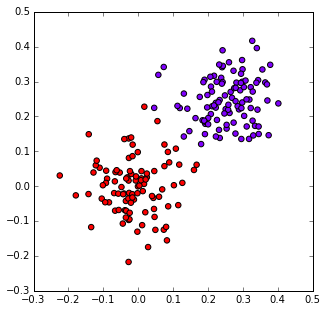

In [5]:
#actually, two iterate is enough in this example
a,b = iterate(a,b)
plt.figure(figsize=(5,5))
plt.scatter(c[:,0],c[:,1],c=y,s=30,cmap=plt.cm.rainbow)

if np.mean(y == y_test) < 0.5:
    print "the accuracy is %.5f"%(1-np.mean(y == y_test))
else:
    print "the accuracy is %.5f"%np.mean(y == y_test)